# Sampling Random Numbers from Different Distributions

Using the Mersenne Twister, we can sample very many random numbers $x_n$ from $U(0, 1)$, the uniform distribution between 0 and 1.

Because we are using <tt>numpy</tt>, we also have access to functions that generate random numbers from other distributions. Since we have to at least know the basic principles behind the built-in functions, let us learn how to obtain other random numbers, starting from those sampled from $U(0, 1)$. This understanding will be helpful if we need to generate random numbers from distributions that are not supported by <tt>numpy</tt>.

## The Uniform Distribution $U(0, 1)$

First, let us learn how to sample random numbers uniformly distributed between 0 and 1 in Python. This can be done as follows:

In [2]:
import numpy as np
x = np.random.rand(100)

To check that these 100 random numbers are indeed uniformly distributed between 0 and 1, let us plot a histogram.

In [3]:
import matplotlib.pyplot as plt
plt.hist(x,20)
plt.show()

<Figure size 640x480 with 1 Axes>

The result is not so good, because there are too few random numbers and too many bins. We can try again with fewer bins.

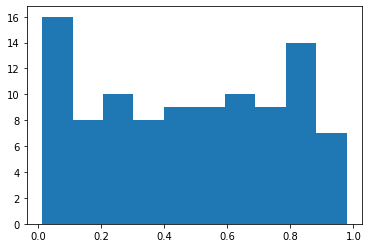

In [4]:
plt.hist(x,10)
plt.show()

This looks better, but the 100 random numbers still do not look like they are uniformly distributed.

Let us try 10,000 random numbers, still with 10 bins.

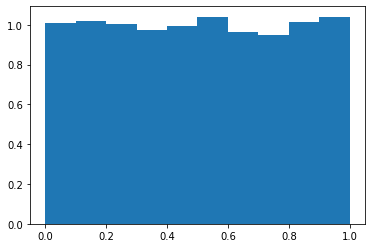

In [5]:
x = np.random.rand(10000)
plt.hist(x,10,density=True)
plt.show()

In this plot, we also invoked the <tt>density</tt> parameter in the <tt>hist()</tt> function so that we are plotting the <em>probability density function (pdf)</em> of $U(0, 1)$.

This looks a lot better for 10 bins, but what about for 20 bins?

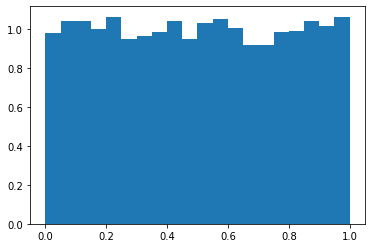

In [6]:
plt.hist(x,20,density=True)
plt.show()

Naturally, if we use more bins, there will be fewer random numbers in each bin, and thus there will be more statistical fluctuations in the pdf.

Ultimately, if we want to plot a smooth pdf, we can go to $10^6$ random numbers.

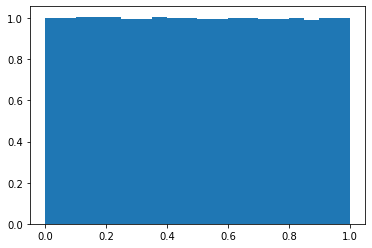

In [7]:
x = np.random.rand(1000000)
plt.hist(x,20,density=True)
plt.show()

## The Uniform Distribution $U(a, b)$

While $U(0,1)$ is useful, sometimes we might want to generate random numbers between $a \neq 0$ and $b \neq 1$. For example, we might want $a = -1$ and $b = 1$.

We can easily transform a random number $x$ drawn from $U(0,1)$ to a random number $y$ drawn from $U(a,b)$ by $y = a + (b - a)x$.

Checking the histogram for $y$,

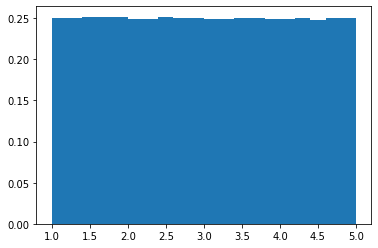

In [8]:
a = 1
b = 5
y = a + (b-a)*x
plt.hist(y,20,density=True)
plt.show()

we see indeed that the histogram is uniform, and agrees with the pdf
\begin{equation}
p(y) = \begin{cases}
\frac{1}{b - a}, & a \leq x \leq b; \\
0, & \text{otherwise} \end{cases}
\end{equation}
of $U(a,b)$.

You can also generate $U(a,b)$ random numbers using the <tt>numpy</tt> built-in function <tt>uniform(a,b)</tt>.

Before we go on to discuss how to generate other random numbers, let us learn how to plot the <em>cumulative distribution function (cdf)</em> of $U(0,1)$.

For any random variable $x$, the cdf $F(x)$ is the probability for us to sample random numbers that are less than $x$ from the pdf. For $U(0,1)$, we know therefore that for $x < 0$, $F(x) = 0$, and for $x > 1$, $F(x) = 1$.

For $0 \leq x \leq 1$, the probability of sampling random numbers smaller than $x$ is simply $F(x) = \int_0^x p(x')\, dx' = \int_0^x dx' = x$.

To plot $F(x)$, we can first create a plotting array <tt>xx</tt> between -1 and 2, and then check how many of our random numbers $x$ are less than <tt>xx</tt>.

In [5]:
xx = np.linspace(-1,2,31)
F = np.zeros(31)
for n in range(31):
    F[n] = sum(x < xx[n])/1000000


This took a long time to run, but its plot

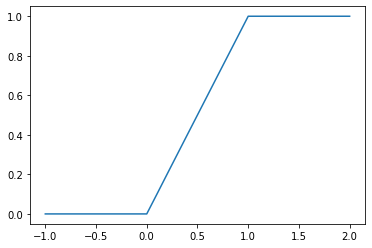

In [6]:
plt.plot(xx,F)
plt.show()

agrees perfectly with what we expect theoretically. You might also notice that while the pdf has visible statistical fluctuations, the cdf is almost perfect!

More importantly, you noted how long the computation took when we asked for merely 31 values of $F(x)$. This is because we have $10^6$ random values of $x$. If we ask for more values of $F(x)$, this method to compute $F(x)$ would take even more time.

Fortunately, there is a simple way to calculate $F(x)$ quickly.

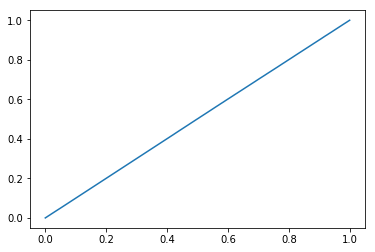

In [8]:
FF = np.arange(len(x))/len(x)
rr = np.sort(x)
plt.plot(rr, FF)
plt.show()

In contrast to the <tt>for</tt> loop to do comparisons, this sorting approach to compute $F(x)$ is very fast, because of the many efficient sorting algorithms available.

In case you are not impressed, remember that the plot above contains $10^6$ values of $F(x)$!

## The Normal Distribution

In many physics problems (for example, the Maxwellian distribution of velocities), we also encounter the normal distribution $N(\mu, \sigma^2)$, whose pdf
\begin{equation}
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left[-\frac{(x - \mu)^2}{2\sigma^2}\right]
\end{equation}
is defined in terms of two parameters, the mean $\mu$, and the variance $\sigma^2$.

In <tt>numpy</tt>, we can generate normally distributed random numbers using the <tt>randn()</tt> function (for the standard normal distribution $N(0, 1)$), or the <tt>normal()</tt> function (for other normal distributions).

Nevertheless, we want to understand how to generate normally-distributed random numbers $x$, starting from uniformly-distributed random numbers $u$. To do this, let us set
\begin{equation}
p(x)\, dx = p(u)\, du.
\end{equation}
Here $p(x)\, dx$ is the probability of finding a normally-distributed random number between $x$ and $x + dx$, while $p(u)\, du$ is the probability of finding a uniformly-distributed random number between $u$ and $u + du$. We want this equality of probability to be true for all $x$, which means that it must be possible to write $x$ in terms of $u$, or $u$ in terms of $x$.

It turns out that it is easier to find this functional relationship if we consider the 'square' of the above equation. To avoid confusing ourselves, let us write
\begin{equation}
p(x)\,dx\, p(y)\, dy = p(u)\, du\, p(v)\, dv,
\end{equation}
where $x$ and $y$ are normally-distributed random variables, while $u$ and $v$ are uniformly-distributed random variables.

For the sake of simplicity, let us consider mapping $U(0,1)$ random variables to $N(0,1)$ random variables. In this case, $p(u) = p(v) = 1$, and the RHS is just $du\, dv$. On the LHS, we combine
\begin{equation}
p(x)p(y)\,dx\,dy = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right) 
\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{y^2}{2}\right)\, dx\,dy = \frac{1}{2\pi}\exp\left(-\frac{x^2 + y^2}{2}\right)\,dx\,dy,
\end{equation}
which we can write in polar coordinates $(r, \theta)$ as
\begin{equation}
\frac{1}{2\pi}\exp\left(-\frac{x^2 + y^2}{2}\right)\,dx\,dy = 
\frac{1}{2\pi}\exp\left(-\frac{r^2}{2}\right)\, r\, dr\,d\theta.
\end{equation}

Now, the term in $r$ can be written as a total derivative, 
\begin{equation}
\exp\left(-\frac{r^2}{2}\right)\, r\, dr = d\left[-\exp\left(-\frac{r^2}{2}\right)\right].
\end{equation}
With this, we can write the equality of probability condition as
\begin{equation}
d\left[-\exp\left(-\frac{r^2}{2}\right)\right] d\left(\frac{\theta}{2\pi}\right) = du\, dv,
\end{equation}
which then allows us to identify
\begin{equation}
\frac{\theta}{2\pi} = v,
\end{equation}
and
\begin{equation}
-\exp\left(-\frac{r^2}{2}\right) = u
\end{equation}
as the uniformly-distributed random variables.

Rewriting the functional relationships between $(r, \theta)$ and $(u, v)$ as
\begin{align}
\theta &= 2\pi v, \\
r &= \sqrt{-2\ln(u)},
\end{align}
we then write the normally-distributed random variables $(x, y)$ as
\begin{align}
x &= r\cos\theta = \sqrt{-2\ln(u)}\cos(2\pi v), \\
y &= r\sin\theta = \sqrt{-2\ln(u)}\sin(2\pi v).
\end{align}
This tells us that to get $x$, we need two uniformly-distributed random variables $u$ and $v$. Fortunately, $y$ is also a perfectly good $N(0,1)$ random variable, so we can use both of them in simulations, before creating another pair $(x, y)$ of standard normal random variables.

Suppose we are given a random variable $z$ from the standard normal distribution $N(0,1)$, we can easily generate a random $x$ from $N(\mu, \sigma^2)$ simply by writing $x = \mu + \sigma z$.

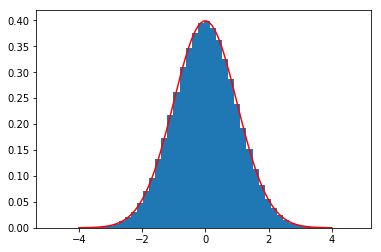

In [15]:
u = np.random.rand(1000000)
v = np.random.rand(1000000)
x = np.sqrt(-2.0*np.log(u))*np.cos(2*np.pi*v)
y = np.sqrt(-2.0*np.log(u))*np.sin(2*np.pi*v)
xx = np.linspace(-4,4,100)
ff = np.exp(-xx**2/2.0)/np.sqrt(2*np.pi)
plt.hist(x,50,density=True)
plt.plot(xx,ff,'r')
plt.show()

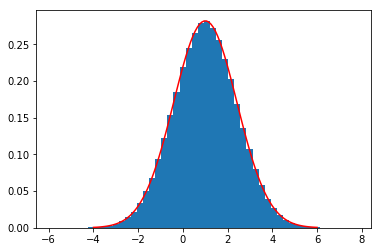

In [17]:
mu = 1.0
sigma2 = 2.0
sigma = np.sqrt(sigma2)
w = mu + sigma*x
ww = np.linspace(-4,6,100)
ff = np.exp(-(ww - mu)**2/(2.0*sigma2))/np.sqrt(2.0*np.pi*sigma2)
plt.hist(w,50,density=True)
plt.plot(ww,ff,'r')
plt.show()

Python exercise to get (x, y) from (u, v)

Python exercise to get $N(\mu, \sigma^2)$ from N(0, 1)


Python exercise to plot pdf of N(0,1) and $N(\mu, \sigma^2)$

Python exercise to plot cdf of N(0,1) and $N(\mu, \sigma^2)$

## Exponential Distribution

pdf + cdf
describes the lifetime of a radioactive nucleus

how to get EXP-distributed random variable from uniformly-distributed random variable

normal distribution cdf has no closed form

EXP distribution cdf closed form, check that the transformation is dictated by the cdf

inverse cdf transform

can do so numerically, if no analytical solutions


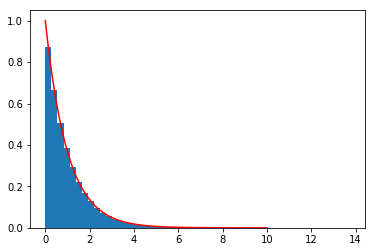

In [18]:
u = np.random.rand(1000000)
x = -np.log(1.0 - u)
xx = np.linspace(0,10,100)
ff = np.exp(-xx)
plt.hist(x,50,density=True)
plt.plot(xx,ff,'r')
plt.show()

## Central Limit Theorem

take average of large samples of uniformly distributed random variables
check that limit is cdf of normal distribution

check average of normally distributed random variables

student-t distributions

try random variables from different $U(a, b)$

try random variables from different $N(\mu, \sigma^2)$


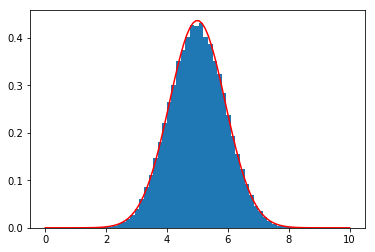

In [22]:
u = np.random.rand(10,100000)
v = np.sum(u,axis=0)
mu = np.mean(v)
sigma2 = np.var(v)
sigma = np.sqrt(sigma2)
vv = np.linspace(0,10,100)
ff = np.exp(-(vv - mu)**2/(2.0*sigma2))/np.sqrt(2.0*np.pi*sigma2)
plt.hist(v,50,density=True)
plt.plot(vv,ff,'r')
plt.show()

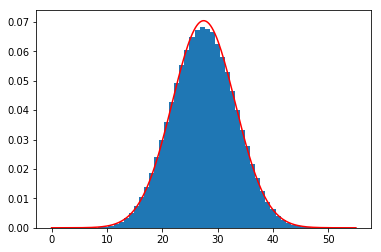

In [25]:
u1 = np.random.uniform(0,1,1000000)
u2 = np.random.uniform(0,2,1000000)
u3 = np.random.uniform(0,3,1000000)
u4 = np.random.uniform(0,4,1000000)
u5 = np.random.uniform(0,5,1000000)
u6 = np.random.uniform(0,6,1000000)
u7 = np.random.uniform(0,7,1000000)
u8 = np.random.uniform(0,8,1000000)
u9 = np.random.uniform(0,9,1000000)
u10 = np.random.uniform(0,10,1000000)
v = u1 + u2 + u3 + u4 + u5 + u6 + u7 + u8 + u9 + u10
mu = np.mean(v)
sigma2 = np.var(v)
vv = np.linspace(0,55,200)
ff = np.exp(-(vv - mu)**2/(2.0*sigma2))/np.sqrt(2.0*np.pi*sigma2)
plt.hist(v,50,density=True)
plt.plot(vv,ff,'r')
plt.show()

## Stochastic Process on top of Another Stochastic Process

## State Space Reducing Processes

## A More General Central Limit Theorem